<a href="https://colab.research.google.com/github/danielmrios/Methodologies-of-Data-Science/blob/main/Weather_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries and load data

In [174]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

The data is daily precipitation measured in Seattle and New York from January 1, 2020 to January 1, 2024.

It's sourced from National Center for Environmental Information using the NOAA climate data source tool: https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND

In [175]:
# Load the Seattle dataset
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

In [176]:
# Load the NYC dataset
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

## Some exploring


In [177]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [178]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


Looks like it has a record of information (precipitation, snow, etc.) from each station for each date

In [179]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


It's not clear what some of these variables are, although for the purposes of our analysis they don't appear to be necessary.

### Check the data types

In [180]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7003 non-null   object 
 1   NAME       7003 non-null   object 
 2   LATITUDE   7003 non-null   float64
 3   LONGITUDE  7003 non-null   float64
 4   ELEVATION  7003 non-null   float64
 5   DATE       7003 non-null   object 
 6   DAPR       143 non-null    float64
 7   MDPR       143 non-null    float64
 8   PRCP       6718 non-null   float64
 9   SNOW       3006 non-null   float64
 10  SNWD       1331 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 711.4+ KB


In [181]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    17465 non-null  object 
 1   NAME       17465 non-null  object 
 2   LATITUDE   17465 non-null  float64
 3   LONGITUDE  17465 non-null  float64
 4   ELEVATION  17465 non-null  float64
 5   DATE       17465 non-null  object 
 6   DAPR       155 non-null    float64
 7   MDPR       151 non-null    float64
 8   PRCP       17275 non-null  float64
 9   SNOW       11508 non-null  float64
 10  SNWD       6318 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 1.7+ MB


DATE should be converted to datetime

In [182]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])

In [183]:
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

### Exploring contd.

Check the shape of each df

In [184]:
df_seattle.shape

(7003, 13)

In [185]:
df_ny.shape

(17465, 13)

Interesting to note that the NY df has significantly more records, this may have something to do with the number of stations as each one gets an entry per day. Let's see what they look like.

In [186]:
stations_seattle = df_seattle['NAME'].unique()
stations_seattle

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

In [187]:
stations_ny = df_ny['NAME'].unique()
stations_ny

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

There are a lot more stations in NY than Seattle, this explains the number of columns being higher.

With this in consideration, there are a couple of possible approaches that come to mind to compare rainfall:

- Choose 1 station from each city to analyze
- Take the average from all stations in each city



## Analyzing the stations more, this could be important when choosing our approach.

The disadvantage of using 1 station is there may be local variability, where specific stations may see more/less rain.


So let's examine whether this is true or not.

In [188]:
# Mean percipitation of each station in Seattle
mean_prcp_seattle = df_seattle.groupby('NAME')['PRCP'].mean()

print(mean_prcp_seattle)

NAME
SEATTLE 2.1 ESE, WA US           0.119486
SEATTLE 2.5 SE, WA US            0.102054
SEATTLE 3.9 SSW, WA US           0.128885
SEATTLE 4.2 N, WA US             0.215312
SEATTLE 4.5 N, WA US             0.260870
SEATTLE 5.5 NNE, WA US           0.125580
SEATTLE 5.6 N, WA US             0.215386
SEATTLE 5.8 SSE, WA US           0.112555
SEATTLE 6.5 SSW, WA US           0.088370
SEATTLE TACOMA AIRPORT, WA US    0.108960
Name: PRCP, dtype: float64


Let's look at this in histogram form

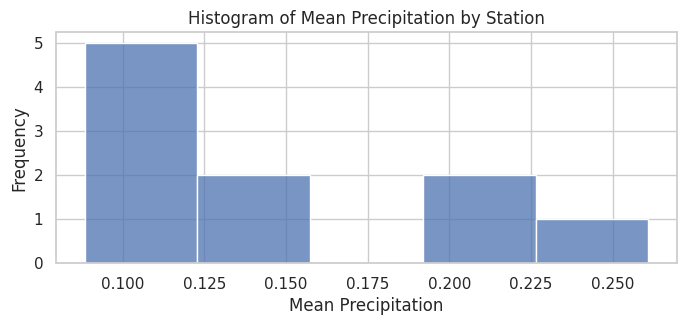

In [189]:
plt.figure(figsize=(8, 3))
sns.histplot(data=mean_prcp_seattle, bins="auto")
plt.xlabel("Mean Precipitation")
plt.ylabel("Frequency")
plt.title("Histogram of Mean Precipitation by Station")
plt.show()

There's a sizeable gap in the precipitation distribution of stations, most are either ranging from 0.08-0.12 or 0.21-0.26.

It might be best to take the average of all stations as choosing one probably doesn't do a good job of representing all stations.

Interested to see if the geography of stations has anything to do with the stark variation in precipitation, let's graph them using folium

In [213]:
import folium
from folium.plugins import MarkerCluster

stations = df_seattle[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE']].drop_duplicates()

# Create a folium map
map = folium.Map(location=[47.6062, -122.3321], zoom_start=11)  # Centered around Seattle

# Add markers for each station
marker_cluster = MarkerCluster().add_to(map)
for i, row in stations.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']], popup=row['NAME']).add_to(marker_cluster)

# Display the map
map

The top three stations in avg precipitation are located in a cluster in north Seattle, this could be interesting to explore further.

Let's also take a look at NY

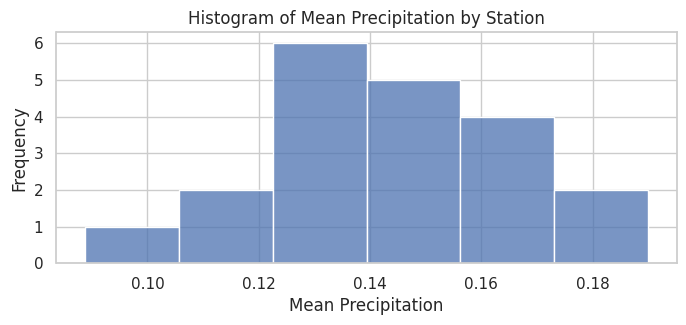

In [190]:
# Mean precipitation of each station in NYC
mean_prcp_ny = df_ny.groupby('NAME')['PRCP'].mean()

plt.figure(figsize=(8, 3))
sns.histplot(data=mean_prcp_ny, bins="auto")
plt.xlabel("Mean Precipitation")
plt.ylabel("Frequency")
plt.title("Histogram of Mean Precipitation by Station")
plt.show()

Looks more normally distributed, although skewed towards higher values. We're still going to shift to the approach of taking the average of all stations.

### Check that the data looks good

Do the stations have the right amount of data? There should be data from the start of 2020 to the end of 2023

In [191]:
# Group the data by name and find the first and last record for each group
date_seattle = df_seattle.groupby('NAME')['DATE'].agg(['min', 'max'])

# Print the first and last records for each name
print(date_seattle)

                                     min        max
NAME                                               
SEATTLE 2.1 ESE, WA US        2020-01-01 2023-12-31
SEATTLE 2.5 SE, WA US         2022-02-14 2023-05-31
SEATTLE 3.9 SSW, WA US        2020-01-01 2022-12-21
SEATTLE 4.2 N, WA US          2020-01-01 2023-12-31
SEATTLE 4.5 N, WA US          2020-01-01 2023-10-18
SEATTLE 5.5 NNE, WA US        2020-01-03 2023-12-31
SEATTLE 5.6 N, WA US          2020-01-01 2023-12-11
SEATTLE 5.8 SSE, WA US        2020-01-01 2022-10-20
SEATTLE 6.5 SSW, WA US        2020-01-01 2020-11-13
SEATTLE TACOMA AIRPORT, WA US 2020-01-01 2023-12-31


Some of these stations have data that isn't consistent with the time scope.

- SEATTLE 2.5 SE, WA US starts in 2022
- SEATTLE 3.9 SSW, WA US stops in 2022
- SEATTLE 5.8 SSE, WA US stops in 2022
- SEATTLE 6.5 SSW, WA US was only active in 2020

Knowing that the stations tend to vary a lot, it'd be best to remove these so we don't see time periods that are skewed.

There are also a couple that end a few weeks earlier than 2023-12-31, this isn't ideal but it isn't necessary to omit the station like the others.

In [192]:
remove = ['SEATTLE 2.5 SE, WA US', 'SEATTLE 3.9 SSW, WA US', 'SEATTLE 5.8 SSE, WA US', 'SEATTLE 6.5 SSW, WA US']

# Remove the rows
df_seattle_filtered = df_seattle[~df_seattle['NAME'].isin(remove)]

# Print the remaining rows
stations_ny_filtered = df_seattle_filtered['NAME'].unique()
stations_ny_filtered

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.5 NNE, WA US'],
      dtype=object)

Take a look at NYC

In [193]:
df_ny['DATE'] = pd.to_datetime(df_ny['DATE'])

# Group the data by 'NAME' and find the first and last record for each group
date_ny = df_ny.groupby('NAME')['DATE'].agg(['min', 'max'])

print(date_ny)

                                                          min        max
NAME                                                                    
ALBERTSON 0.2 SSE, NY US                           2020-01-01 2023-12-31
ALBERTSON 0.5 SW, NY US                            2021-07-08 2023-09-22
AMITYVILLE 0.1 WSW, NY US                          2020-01-01 2023-12-31
ARMONK 0.3 SE, NY US                               2020-01-01 2023-12-31
BRIARCLIFF MANOR 1.3 NE, NY US                     2020-04-12 2023-12-30
CENTERPORT 0.9 SW, NY US                           2020-01-01 2022-02-05
EAST ROCKAWAY 0.5 S, NY US                         2023-04-12 2023-12-31
FARMINGDALE REPUBLIC AIRPORT, NY US                2020-01-01 2023-12-31
FLORAL PARK 0.4 W, NY US                           2020-01-01 2023-01-22
JFK INTERNATIONAL AIRPORT, NY US                   2020-01-01 2023-12-31
LINDENHURST 1.0 NE, NY US                          2023-03-24 2023-12-31
LITTLE NECK 0.3 SE, NY US                          

Making it easier to find inconsistent data

In [194]:
# Find dates that either don't start with 2020-01-01 or don't end with 2023-12-31
wrong_date_ny = date_ny[
    ~(date_ny['min'].dt.strftime('%Y-%m-%d').str.startswith('2020-01-01')) |
    ~(date_ny['max'].dt.strftime('%Y-%m-%d').str.endswith('2023-12-31'))
]

print(wrong_date_ny)

                                                          min        max
NAME                                                                    
ALBERTSON 0.5 SW, NY US                            2021-07-08 2023-09-22
BRIARCLIFF MANOR 1.3 NE, NY US                     2020-04-12 2023-12-30
CENTERPORT 0.9 SW, NY US                           2020-01-01 2022-02-05
EAST ROCKAWAY 0.5 S, NY US                         2023-04-12 2023-12-31
FLORAL PARK 0.4 W, NY US                           2020-01-01 2023-01-22
LINDENHURST 1.0 NE, NY US                          2023-03-24 2023-12-31
LITTLE NECK 0.3 SE, NY US                          2021-06-01 2023-12-31
MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US 2020-11-16 2021-10-19
NEW HEMPSTEAD 0.6 SE, NY US                        2020-12-05 2023-12-31
QUEENS 4.7 SW, NY US                               2020-06-10 2020-11-16
SPRING VALLEY 1.7 SSW, NY US                       2023-02-23 2023-12-31
STATEN ISLAND 2.6 N, NY US                         

There are a number of inconsistent stations in the NY dataset as well, all of them somewhat significant in terms of missing data.

Although the distribution isn't as off as Seattle it still is skewed towards high values, so it's best to remove these stations.

In [195]:
remove_ny = ['ALBERTSON 0.5 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US', 'CENTERPORT 0.9 SW, NY US', 'EAST ROCKAWAY 0.5 S, NY US', 'FLORAL PARK 0.4 W, NY US',
             'LINDENHURST 1.0 NE, NY US', 'LITTLE NECK 0.3 SE, NY US', 'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US', 'NEW HEMPSTEAD 0.6 SE, NY US',
             'QUEENS 4.7 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US', 'STATEN ISLAND 2.6 N, NY US', 'THORNWOOD 0.7 NW, NY US']

# Remove the rows
df_ny_filtered = df_ny[~df_ny['NAME'].isin(remove_ny)]

# Print the remaining rows
stations_ny_filtered = df_ny_filtered['NAME'].unique()
stations_ny_filtered

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US'], dtype=object)

## Handling missing values

Use the msno matrix to see if and where there are missing values in precipitation.

<Axes: >

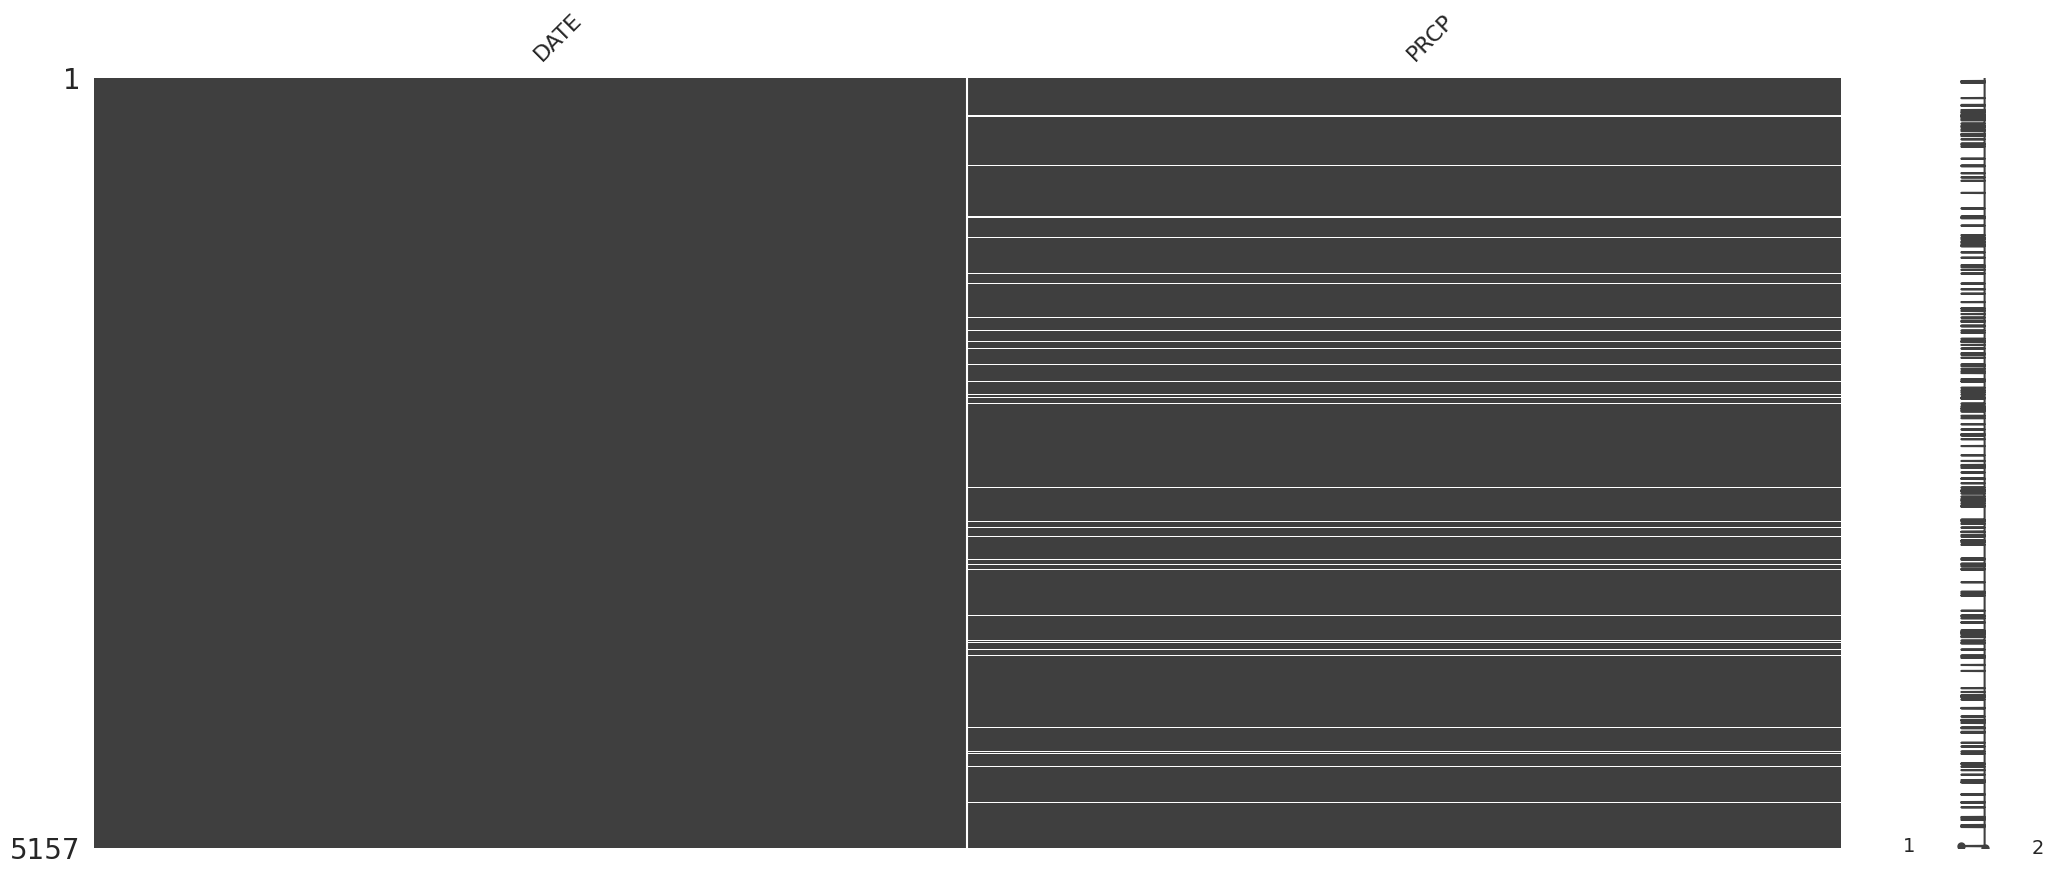

In [196]:
msno.matrix(df_seattle_filtered[['DATE','PRCP']])

<Axes: >

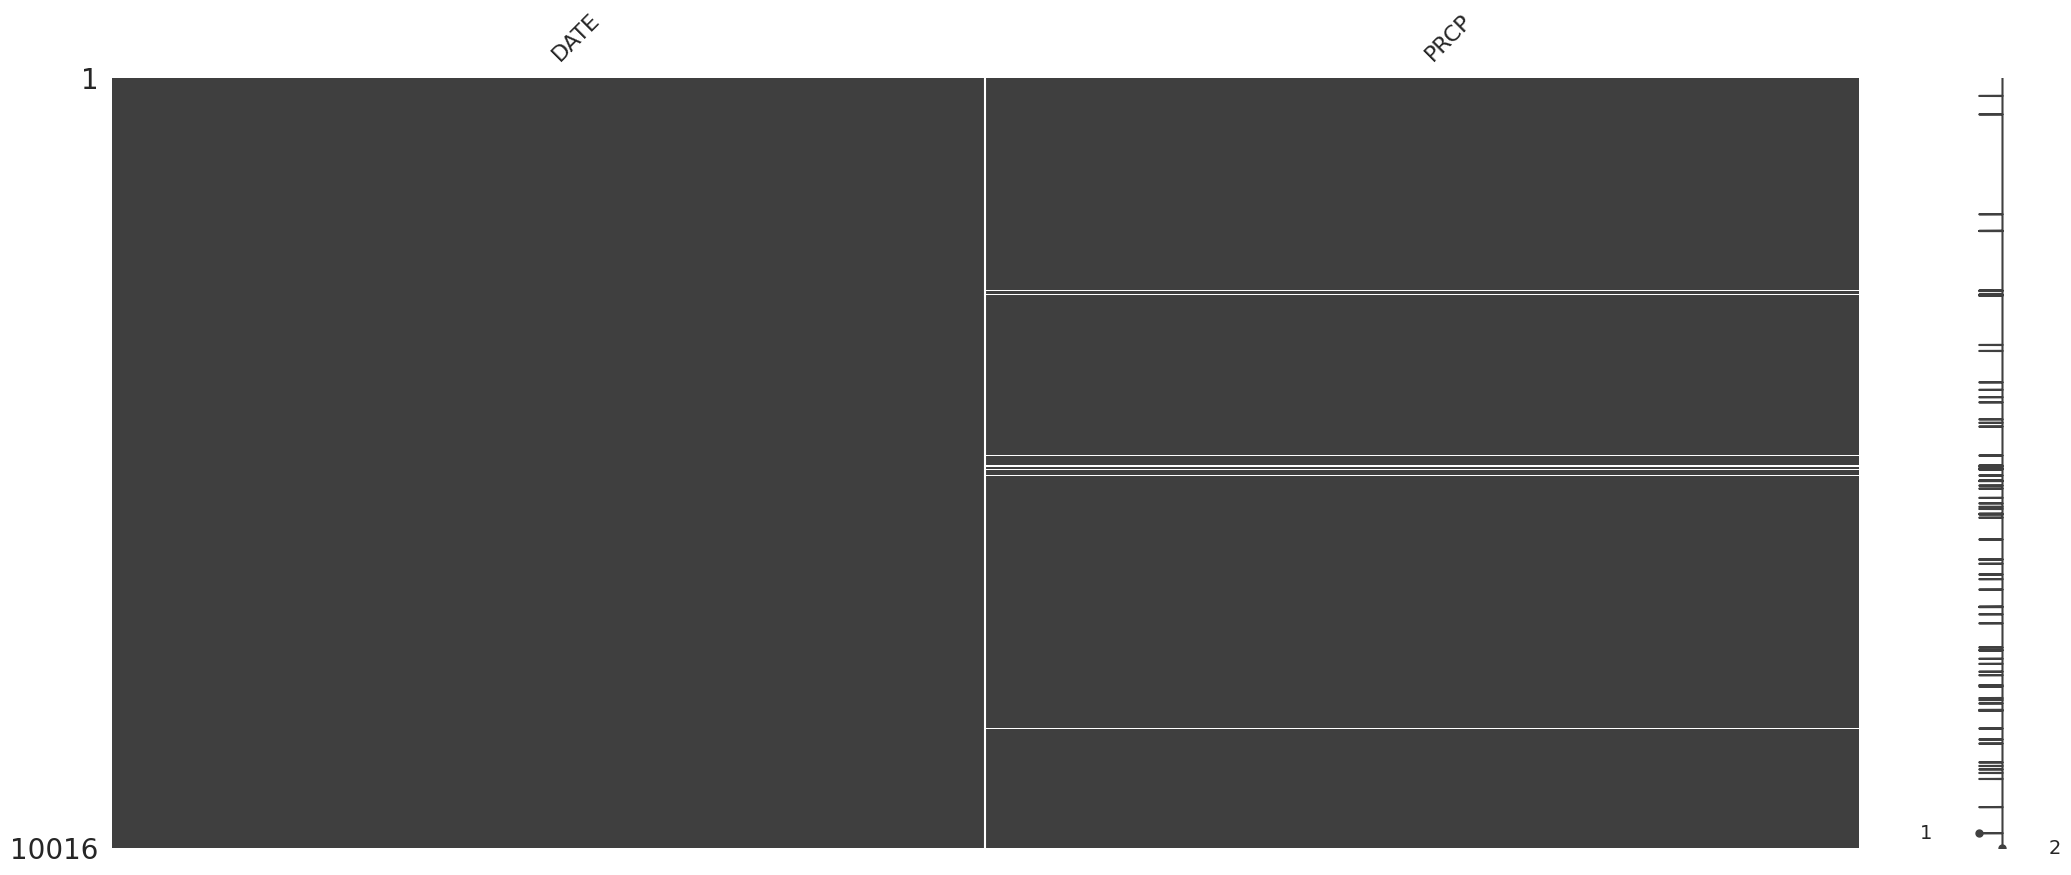

In [214]:
msno.matrix(df_ny_filtered[['DATE','PRCP']])

There are some NaN values at points in each dataset, noticeably more in Seattle.

To handle these, rather than impute values we'll remove them because there's data from other stations we can rely on.

In [219]:
# Drop all rows with missing values in Seattle
df_seattle_filtered = df_seattle_filtered.dropna(subset=['PRCP'])

# Get the new null count
null_counts_seattle = df_seattle_filtered.isnull().sum()
print(null_counts_seattle)

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
DAPR         4930
MDPR         4930
PRCP            0
SNOW         2616
SNWD         3611
DASF         4932
MDSF         4932
dtype: int64


In [220]:
# Drop all rows with missing values in ny
df_ny_filtered = df_ny_filtered.dropna(subset=['PRCP'])

null_counts_ny = df_ny_filtered.isnull().sum()
print(null_counts_ny)

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
DAPR         9939
MDPR         9939
PRCP            0
SNOW         2751
SNWD         4243
DASF         9942
MDSF         9942
dtype: int64


All null values in PRCP have been dropped, we'll remove the unnecessary variables from the df next.

## Now let's create the dataframes with averages

Create a df holding the mean precipitation for each day

In [198]:
df_seattle_avg = df_seattle_filtered.groupby(by="DATE", as_index=False)["PRCP"].mean()
df_ny_avg = df_ny_filtered.groupby(by="DATE", as_index=False)["PRCP"].mean()

In [199]:
df_seattle_avg

,DATE,PRCP
0,2020-01-01,0.138000
1,2020-01-02,0.290000
2,2020-01-03,0.276000
3,2020-01-04,0.125000
4,2020-01-05,0.187500
...,...,...
1456,2023-12-27,0.063333
1457,2023-12-28,0.240000
1458,2023-12-29,0.055000
1459,2023-12-30,0.042500


How many rows should there be?
4 x 365 + 1 = 1461

In [200]:
df_seattle_avg.shape

(1461, 2)

In [201]:
df_ny_avg.shape

(1461, 2)

Looks good. Let's see if they look like what we expect graphed over a time series.

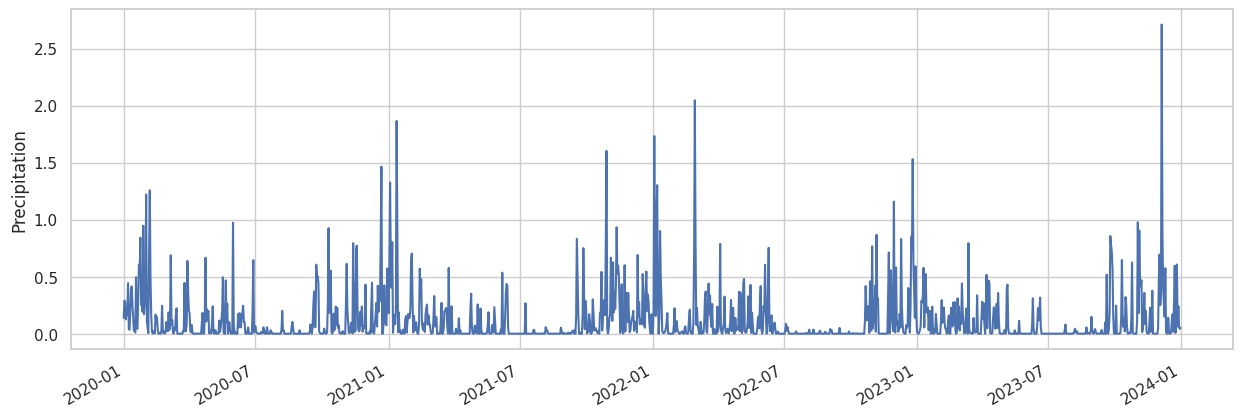

In [202]:
fig, ax = plt.subplots()
ax.plot(df_seattle_avg["DATE"], df_seattle_avg["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

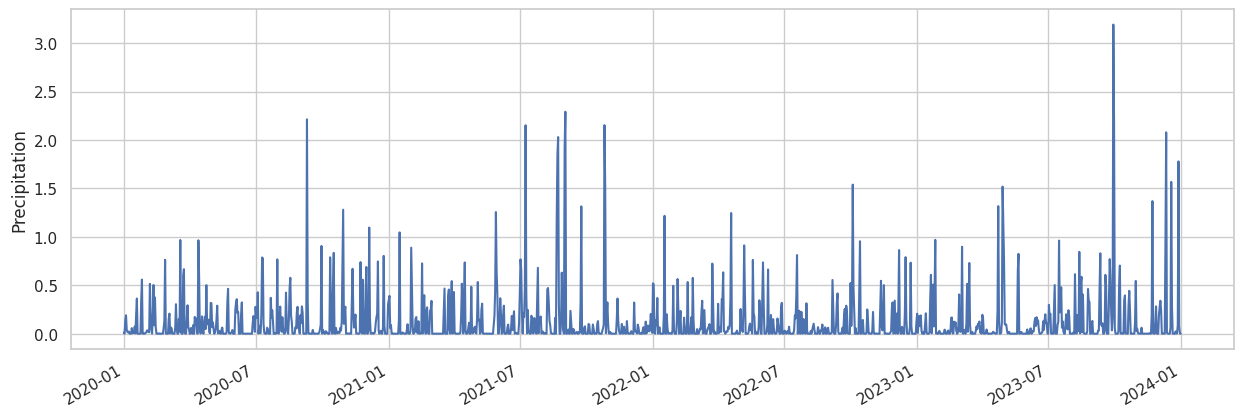

In [203]:
fig, ax = plt.subplots()
ax.plot(df_ny_avg["DATE"], df_ny_avg["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

Yep, now let's join the two df's.

Join the two on inner join, the data should match.

In [204]:
df_avg = df_seattle_avg.merge(df_ny_avg, on = 'DATE', how = 'inner')

In [205]:
df_avg

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.138000,0.011429
1,2020-01-02,0.290000,0.000000
2,2020-01-03,0.276000,0.137143
3,2020-01-04,0.125000,0.190000
4,2020-01-05,0.187500,0.038571
...,...,...,...
1456,2023-12-27,0.063333,0.085714
1457,2023-12-28,0.240000,1.778571
1458,2023-12-29,0.055000,0.078571
1459,2023-12-30,0.042500,0.001429


Success

## Tidy it up

Melt the data so the city's are seperated

In [206]:
df_tidy = pd.melt(df_avg, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')

df_tidy

,DATE,city,precipitation
0,2020-01-01,PRCP_x,0.138000
1,2020-01-02,PRCP_x,0.290000
2,2020-01-03,PRCP_x,0.276000
3,2020-01-04,PRCP_x,0.125000
4,2020-01-05,PRCP_x,0.187500
...,...,...,...
2917,2023-12-27,PRCP_y,0.085714
2918,2023-12-28,PRCP_y,1.778571
2919,2023-12-29,PRCP_y,0.078571
2920,2023-12-30,PRCP_y,0.001429


Add the right city names

In [207]:
df_tidy.loc[df_tidy['city'] == 'PRCP_x','city'] = 'Seattle'

df_tidy.loc[df_tidy['city'] == 'PRCP_y','city'] = 'NYC'

df_tidy

,DATE,city,precipitation
0,2020-01-01,Seattle,0.138000
1,2020-01-02,Seattle,0.290000
2,2020-01-03,Seattle,0.276000
3,2020-01-04,Seattle,0.125000
4,2020-01-05,Seattle,0.187500
...,...,...,...
2917,2023-12-27,NYC,0.085714
2918,2023-12-28,NYC,1.778571
2919,2023-12-29,NYC,0.078571
2920,2023-12-30,NYC,0.001429


Rename DATE to lowercase

In [208]:
df_tidy = df_tidy.rename(columns={'DATE':'date'})

df_tidy

,date,city,precipitation
0,2020-01-01,Seattle,0.138000
1,2020-01-02,Seattle,0.290000
2,2020-01-03,Seattle,0.276000
3,2020-01-04,Seattle,0.125000
4,2020-01-05,Seattle,0.187500
...,...,...,...
2917,2023-12-27,NYC,0.085714
2918,2023-12-28,NYC,1.778571
2919,2023-12-29,NYC,0.078571
2920,2023-12-30,NYC,0.001429


Simple plot to see how the merged df looks

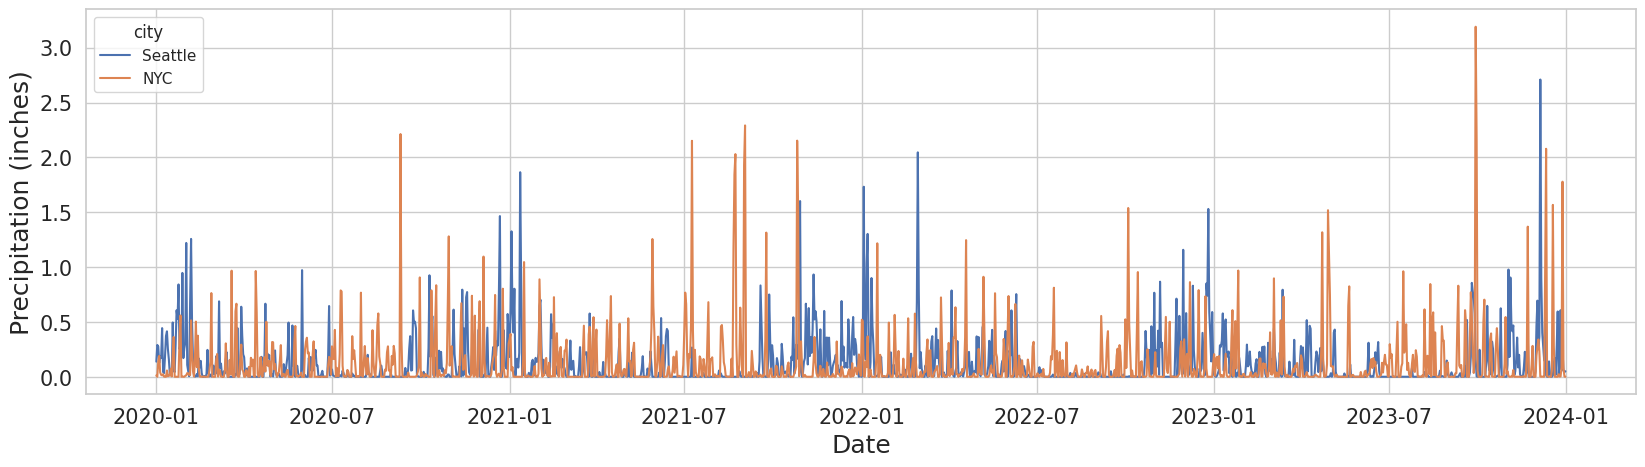

In [209]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_tidy, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

## Export the clean csv file

In [210]:
df_tidy.to_csv('clean_seattle_nyc_weather.csv', index=False)